Epoch 0, Loss: 0.5698453327336424
Epoch 1000, Loss: 0.42000020915472147
Epoch 2000, Loss: 0.42000008821826706
Epoch 3000, Loss: 0.42000004936724666
Epoch 4000, Loss: 0.4200000305944483
Epoch 5000, Loss: 0.4200000196741769
Epoch 6000, Loss: 0.4200000125970815
Epoch 7000, Loss: 0.42000000767196793
Epoch 8000, Loss: 0.42000000406603866
Epoch 9000, Loss: 0.420000001323349


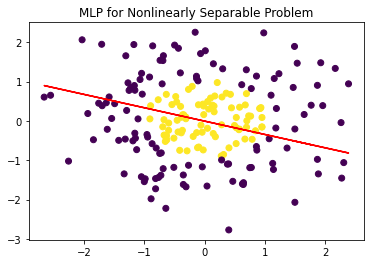

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成非线性可分的数据集
np.random.seed(0)
num_points = 200
x_data = np.random.randn(num_points, 2)
y_data = (x_data[:, 0]**2 + x_data[:, 1]**2 < 1).astype(int)

# 定义多层感知机的参数
input_size = 2
hidden_size = 200
output_size = 1
learning_rate = 0.1
epochs = 10000

# 初始化权重和偏置
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros(output_size)

# 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 激活函数的导数
def sigmoid_derivative(x):
    return x * (1 - x)

# 训练多层感知机
for epoch in range(epochs):
    # 前向传播
    hidden_layer_input = np.dot(x_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # 计算损失
    error = y_data.reshape(-1, 1) - predicted_output
    loss = np.mean(np.square(error))

    # 反向传播
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # 更新权重和偏置
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0) * learning_rate
    weights_input_hidden += x_data.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 可视化结果
with np.errstate(divide='ignore', invalid='ignore'):
    decision_boundary = (-bias_hidden[0] - weights_input_hidden[0, 0] * x_data[:, 0]) / weights_input_hidden[1, 0]
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
    plt.plot(x_data[:, 0], decision_boundary, color='red')
    plt.title("MLP for Nonlinearly Separable Problem")
    plt.show()

Epoch 0, Loss: 0.24465443663081474
Epoch 1000, Loss: 0.008582877739041544
Epoch 2000, Loss: 0.003133315666965155
Epoch 3000, Loss: 0.0035174673852248106
Epoch 4000, Loss: 0.0020690358124525765
Epoch 5000, Loss: 0.0016399448232008302
Epoch 6000, Loss: 0.00027413868101136156
Epoch 7000, Loss: 0.00015513999971008294
Epoch 8000, Loss: 0.00011430445134888327
Epoch 9000, Loss: 9.209078055874083e-05


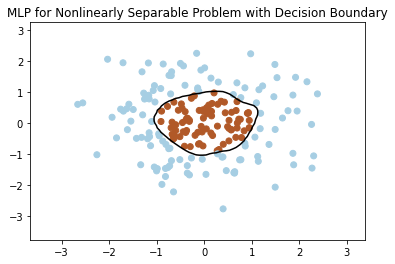

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 200
x_data = np.random.randn(num_points, 2)
y_data = (x_data[:, 0]**2 + x_data[:, 1]**2 < 1).astype(int)

input_size = 2
hidden_size1 =4
hidden_size2 = 8
output_size = 1
learning_rate = 0.1
epochs = 10000

weights_input_hidden1 = np.random.randn(input_size, hidden_size1)
bias_hidden1 = np.zeros(hidden_size1)
weights_hidden1_hidden2 = np.random.randn(hidden_size1, hidden_size2)
bias_hidden2 = np.zeros(hidden_size2)
weights_hidden2_output = np.random.randn(hidden_size2, output_size)
bias_output = np.zeros(output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

for epoch in range(epochs):
    hidden_layer1_input = np.dot(x_data, weights_input_hidden1) + bias_hidden1
    hidden_layer1_output = sigmoid(hidden_layer1_input)
    hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden_layer2_output = sigmoid(hidden_layer2_input)
    output_layer_input = np.dot(hidden_layer2_output, weights_hidden2_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    error = y_data.reshape(-1, 1) - predicted_output
    loss = np.mean(np.square(error))

    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer2 = d_output.dot(weights_hidden2_output.T)
    d_hidden_layer2 = error_hidden_layer2 * sigmoid_derivative(hidden_layer2_output)
    error_hidden_layer1 = d_hidden_layer2.dot(weights_hidden1_hidden2.T)
    d_hidden_layer1 = error_hidden_layer1 * sigmoid_derivative(hidden_layer1_output)

    weights_hidden2_output += hidden_layer2_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0) * learning_rate
    weights_hidden1_hidden2 += hidden_layer1_output.T.dot(d_hidden_layer2) * learning_rate
    bias_hidden2 += np.sum(d_hidden_layer2, axis=0) * learning_rate
    weights_input_hidden1 += x_data.T.dot(d_hidden_layer1) * learning_rate
    bias_hidden1 += np.sum(d_hidden_layer1, axis=0) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

grid_resolution = 100
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_resolution), np.linspace(y_min, y_max, grid_resolution))
grid_points = np.c_[xx.ravel(), yy.ravel()]
hidden_layer1_input_grid = np.dot(grid_points, weights_input_hidden1) + bias_hidden1
hidden_layer1_output_grid = sigmoid(hidden_layer1_input_grid)
hidden_layer2_input_grid = np.dot(hidden_layer1_output_grid, weights_hidden1_hidden2) + bias_hidden2
hidden_layer2_output_grid = sigmoid(hidden_layer2_input_grid)
output_layer_input_grid = np.dot(hidden_layer2_output_grid, weights_hidden2_output) + bias_output
predicted_grid = sigmoid(output_layer_input_grid)
Z = predicted_grid.reshape(xx.shape)

# 绘制决策边界
contour_levels = [0.5]
plt.contour(xx, yy, Z, levels=contour_levels, colors='k')
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=plt.cm.Paired)
plt.title("MLP for Nonlinearly Separable Problem with Decision Boundary")
plt.show()

以下是对上述代码的原理介绍：

**一、数据生成**

1. 使用`np.random.seed(0)`设置随机数种子，确保每次运行代码生成的随机数据相同，方便调试和观察结果。
2. 生成`num_points`（200）个二维数据点`x_data`，通过`np.random.randn(num_points, 2)`从标准正态分布中采样。
3. 根据数据点是否满足特定条件（$x_data[:, 0]**2 + x_data[:, 1]**2 < 1$）确定标签`y_data`，小于 1 为 1，否则为 0，从而创建一个非线性可分的数据集。

**二、多层感知机结构定义**

1. 设置输入层、隐藏层和输出层的节点数：
   - `input_size = 2`表示输入层有两个特征（对应二维数据点的两个坐标）。
   - `hidden_size1 = 20`和`hidden_size2 = 20`分别表示两个隐藏层的节点数。
   - `output_size = 1`表示输出层只有一个节点，用于预测数据点属于某一类的概率。
2. 初始化权重和偏置：
   - `weights_input_hidden1`、`weights_hidden1_hidden2`和`weights_hidden2_output`分别是输入层到第一个隐藏层、第一个隐藏层到第二个隐藏层、第二个隐藏层到输出层的连接权重，随机初始化。
   - `bias_hidden1`、`bias_hidden2`和`bias_output`分别是两个隐藏层和输出层的偏置，初始化为零。

**三、激活函数**

使用`sigmoid`函数作为激活函数，将神经元的输入映射到 0 到 1 之间的值。激活函数的导数`sigmoid_derivative`在反向传播过程中用于计算梯度。

**四、训练过程**

1. **前向传播**：
   - 对于输入数据`x_data`，依次计算每个层的输入和输出。
   - 首先，计算第一个隐藏层的输入`hidden_layer1_input = np.dot(x_data, weights_input_hidden1) + bias_hidden1`，然后通过激活函数得到第一个隐藏层的输出`hidden_layer1_output = sigmoid(hidden_layer1_input)`。
   - 接着，以第一个隐藏层的输出作为输入，计算第二个隐藏层的输入和输出。
   - 最后，以第二个隐藏层的输出作为输入，计算输出层的输入和输出。
2. **计算损失**：
   - 损失函数采用均方误差，计算预测输出`predicted_output`与真实标签`y_data`之间的误差，即`error = y_data.reshape(-1, 1) - predicted_output`，然后计算均方误差损失`loss = np.mean(np.square(error))`。
3. **反向传播**：
   - 从输出层开始，根据损失函数对输出的导数和激活函数的导数，计算输出层的误差反向传播值`d_output`。
   - 然后依次计算每个隐藏层的误差反向传播值，例如`error_hidden_layer2 = d_output.dot(weights_hidden2_output.T)`表示第二个隐藏层的误差是输出层误差乘以输出层到第二个隐藏层的权重转置。
   - 根据误差反向传播值和激活函数的导数计算每个层的梯度。
4. **更新权重和偏置**：
   - 根据学习率和每个层的梯度，更新连接权重和偏置，例如`weights_hidden2_output += hidden_layer2_output.T.dot(d_output) * learning_rate`表示更新第二个隐藏层到输出层的权重。

**五、可视化决策边界**

1. 创建二维网格点：
   - 确定网格的范围`x_min, x_max`和`y_min, y_max`，然后使用`np.meshgrid`创建二维网格点`xx`和`yy`。
   - 将网格点展平为一维数组`grid_points`，以便进行前向传播计算。
2. 前向传播计算网格点的预测输出：
   - 对于网格点，依次计算每个层的输出，得到最终的预测输出`predicted_grid`。
   - 将预测输出重塑为二维网格形状`Z`。
3. 绘制决策边界：
   - 使用`plt.contour`绘制决策边界，通过设置特定的等高线水平值（这里为 0.5），只显示决策边界。
   - 使用`plt.scatter`绘制原始数据点，并根据标签进行着色。
   - 设置图形标题并显示图形。

通过不断迭代训练过程，调整多层感知机的权重和偏置，使得损失函数最小化，从而让模型能够更好地对非线性可分的数据集进行分类，并通过可视化决策边界展示模型的分类效果。

In [6]:
import graphviz

def draw_mlp():
    dot = graphviz.Digraph(comment='MLP Structure')

    # Input layer
    with dot.subgraph(name='cluster_input') as c:
        c.attr(label='Input Layer (2 nodes)')
        c.node('input_1')
        c.node('input_2')

    # Hidden layer 1
    with dot.subgraph(name='cluster_hidden1') as c:
        c.attr(label='Hidden Layer 1 (20 nodes)')
        for i in range(1, 21):
            c.node(f'hidden1_{i}')

    # Hidden layer 2
    with dot.subgraph(name='cluster_hidden2') as c:
        c.attr(label='Hidden Layer 2 (20 nodes)')
        for i in range(1, 21):
            c.node(f'hidden2_{i}')

    # Output layer
    with dot.subgraph(name='cluster_output') as c:
        c.attr(label='Output Layer (1 node)')
        c.node('output')

    # Connections from input to hidden layer 1
    for h1_node in range(1, 21):
        dot.edge('input_1', f'hidden1_{h1_node}')
        dot.edge('input_2', f'hidden1_{h1_node}')

    # Connections from hidden layer 1 to hidden layer 2
    for h2_node in range(1, 21):
        for h1_node in range(1, 21):
            dot.edge(f'hidden1_{h1_node}', f'hidden2_{h2_node}')

    # Connections from hidden layer 2 to output
    for h2_node in range(1, 21):
        dot.edge(f'hidden2_{h2_node}', 'output')

    return dot

mlp_graph = draw_mlp()
mlp_graph.render('mlp_structure', view=True)

'mlp_structure.pdf'

Epoch 0, Loss: 0.2680628578448228
Epoch 1000, Loss: 0.004074067938960636
Epoch 2000, Loss: 0.0014990855710469509
Epoch 3000, Loss: 0.0007819218841371027
Epoch 4000, Loss: 0.0004920858127947966
Epoch 5000, Loss: 0.0003455945383970167
Epoch 6000, Loss: 0.0002603553443229132
Epoch 7000, Loss: 0.00020581057940706222
Epoch 8000, Loss: 0.00016845425990455056
Epoch 9000, Loss: 0.00014153951739557014


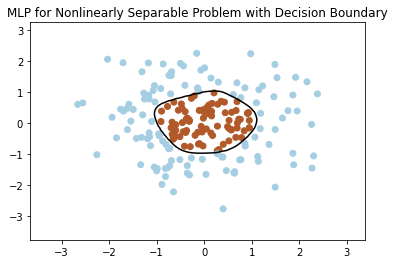

'mlp_structure.pdf'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz

# 生成非线性可分的数据集
np.random.seed(0)
num_points = 200
x_data = np.random.randn(num_points, 2)
y_data = (x_data[:, 0]**2 + x_data[:, 1]**2 < 1).astype(int)

# 定义多层感知机的参数
input_size = 2
hidden_size1 = 20
hidden_size2 = 20
output_size = 1
learning_rate = 0.05
epochs = 10000

# 初始化权重和偏置
weights_input_hidden1 = np.random.randn(input_size, hidden_size1)
bias_hidden1 = np.zeros(hidden_size1)
weights_hidden1_hidden2 = np.random.randn(hidden_size1, hidden_size2)
bias_hidden2 = np.zeros(hidden_size2)
weights_hidden2_output = np.random.randn(hidden_size2, output_size)
bias_output = np.zeros(output_size)

# 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 激活函数的导数
def sigmoid_derivative(x):
    return x * (1 - x)

# 训练多层感知机
for epoch in range(epochs):
    # 前向传播
    hidden_layer1_input = np.dot(x_data, weights_input_hidden1) + bias_hidden1
    hidden_layer1_output = sigmoid(hidden_layer1_input)
    hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden_layer2_output = sigmoid(hidden_layer2_input)
    output_layer_input = np.dot(hidden_layer2_output, weights_hidden2_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # 计算损失
    error = y_data.reshape(-1, 1) - predicted_output
    loss = np.mean(np.square(error))

    # 反向传播
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer2 = d_output.dot(weights_hidden2_output.T)
    d_hidden_layer2 = error_hidden_layer2 * sigmoid_derivative(hidden_layer2_output)
    error_hidden_layer1 = d_hidden_layer2.dot(weights_hidden1_hidden2.T)
    d_hidden_layer1 = error_hidden_layer1 * sigmoid_derivative(hidden_layer1_output)

    # 更新权重和偏置
    weights_hidden2_output += hidden_layer2_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0) * learning_rate
    weights_hidden1_hidden2 += hidden_layer1_output.T.dot(d_hidden_layer2) * learning_rate
    bias_hidden2 += np.sum(d_hidden_layer2, axis=0) * learning_rate
    weights_input_hidden1 += x_data.T.dot(d_hidden_layer1) * learning_rate
    bias_hidden1 += np.sum(d_hidden_layer1, axis=0) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 可视化结果
with np.errstate(divide='ignore', invalid='ignore'):
    grid_resolution = 100
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_resolution), np.linspace(y_min, y_max, grid_resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    hidden_layer1_input_grid = np.dot(grid_points, weights_input_hidden1) + bias_hidden1
    hidden_layer1_output_grid = sigmoid(hidden_layer1_input_grid)
    hidden_layer2_input_grid = np.dot(hidden_layer1_output_grid, weights_hidden1_hidden2) + bias_hidden2
    hidden_layer2_output_grid = sigmoid(hidden_layer2_input_grid)
    output_layer_input_grid = np.dot(hidden_layer2_output_grid, weights_hidden2_output) + bias_output
    predicted_grid = sigmoid(output_layer_input_grid)
    Z = predicted_grid.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='k')
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=plt.cm.Paired)
    plt.title("MLP for Nonlinearly Separable Problem with Decision Boundary")
    plt.show()

# 绘制神经网络结构
def draw_mlp(input_size, hidden_size1, hidden_size2, output_size):
    dot = graphviz.Digraph(comment='MLP Structure')
    with dot.subgraph(name='cluster_input') as c:
        c.attr(label=f'Input Layer ({input_size} nodes)')
        for i in range(1, input_size + 1):
            c.node(f'input_{i}')
    with dot.subgraph(name='cluster_hidden1') as c:
        c.attr(label=f'Hidden Layer 1 ({hidden_size1} nodes)')
        for i in range(1, hidden_size1 + 1):
            c.node(f'hidden1_{i}')
    with dot.subgraph(name='cluster_hidden2') as c:
        c.attr(label=f'Hidden Layer 2 ({hidden_size2} nodes)')
        for i in range(1, hidden_size2 + 1):
            c.node(f'hidden2_{i}')
    with dot.subgraph(name='cluster_output') as c:
        c.attr(label=f'Output Layer ({output_size} nodes)')
        for i in range(1, output_size + 1):
            c.node(f'output_{i}')
    for h1_node in range(1, hidden_size1 + 1):
        for input_node in range(1, input_size + 1):
            dot.edge(f'input_{input_node}', f'hidden1_{h1_node}')
    for h2_node in range(1, hidden_size2 + 1):
        for h1_node in range(1, hidden_size1 + 1):
            dot.edge(f'hidden1_{h1_node}', f'hidden2_{h2_node}')
    for output_node in range(1, output_size + 1):
        for h2_node in range(1, hidden_size2 + 1):
            dot.edge(f'hidden2_{h2_node}', f'output_{output_node}')
    return dot

mlp_graph = draw_mlp(input_size, hidden_size1, hidden_size2, output_size)
mlp_graph.render('mlp_structure', view=True)